# Árvores de regressão - exercícios 01

*Atenção! Devido descontinuação da base de imóveis boston os alunos devem utilizar a base de dados que se encontra em anexo.*

A base que utilizaremos contem os dados dos imóveis da california.
Considerem como variável Target (a ser prevista) a coluna median_house_value.
O dataset é muito semelhante ao de boston, contendo localização, quartos, banheiros e outras variáveis interessantes para construção do modelo.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score



### 1. Certifique-se de que esta base está no formato adequado para o scikitlearn.
ok, essa tarefa é tão fácil que você vai até desconfiar. Mas é preciso ter confiança sobre os dados que se usa ;)

In [3]:
df = pd.read_csv('housing.csv')
df_sk = df.dropna().copy()
df_sk = pd.get_dummies(df_sk, columns=['ocean_proximity'])
df_sk.reset_index(inplace=True)
df_sk.drop(columns='index', inplace=True)
df_sk

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20428,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,False,True,False,False,False
20429,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,False,True,False,False,False
20430,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,False,True,False,False,False
20431,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,False,True,False,False,False


In [4]:
# Separar features e target
X = df_sk.drop('median_house_value', axis=1)
y = df_sk['median_house_value']

### 2.  Visualize a matriz de correlação, e veja se aparentemente você encontra alguma variável com potencial preditivo interessante.

In [5]:
df_sk.corr().iloc[8].to_frame().sort_values(by='median_house_value', ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.688355
ocean_proximity_<1H OCEAN,0.257614
ocean_proximity_NEAR BAY,0.160526
ocean_proximity_NEAR OCEAN,0.140378
total_rooms,0.133294
housing_median_age,0.106432
households,0.064894
total_bedrooms,0.049686
ocean_proximity_ISLAND,0.023525


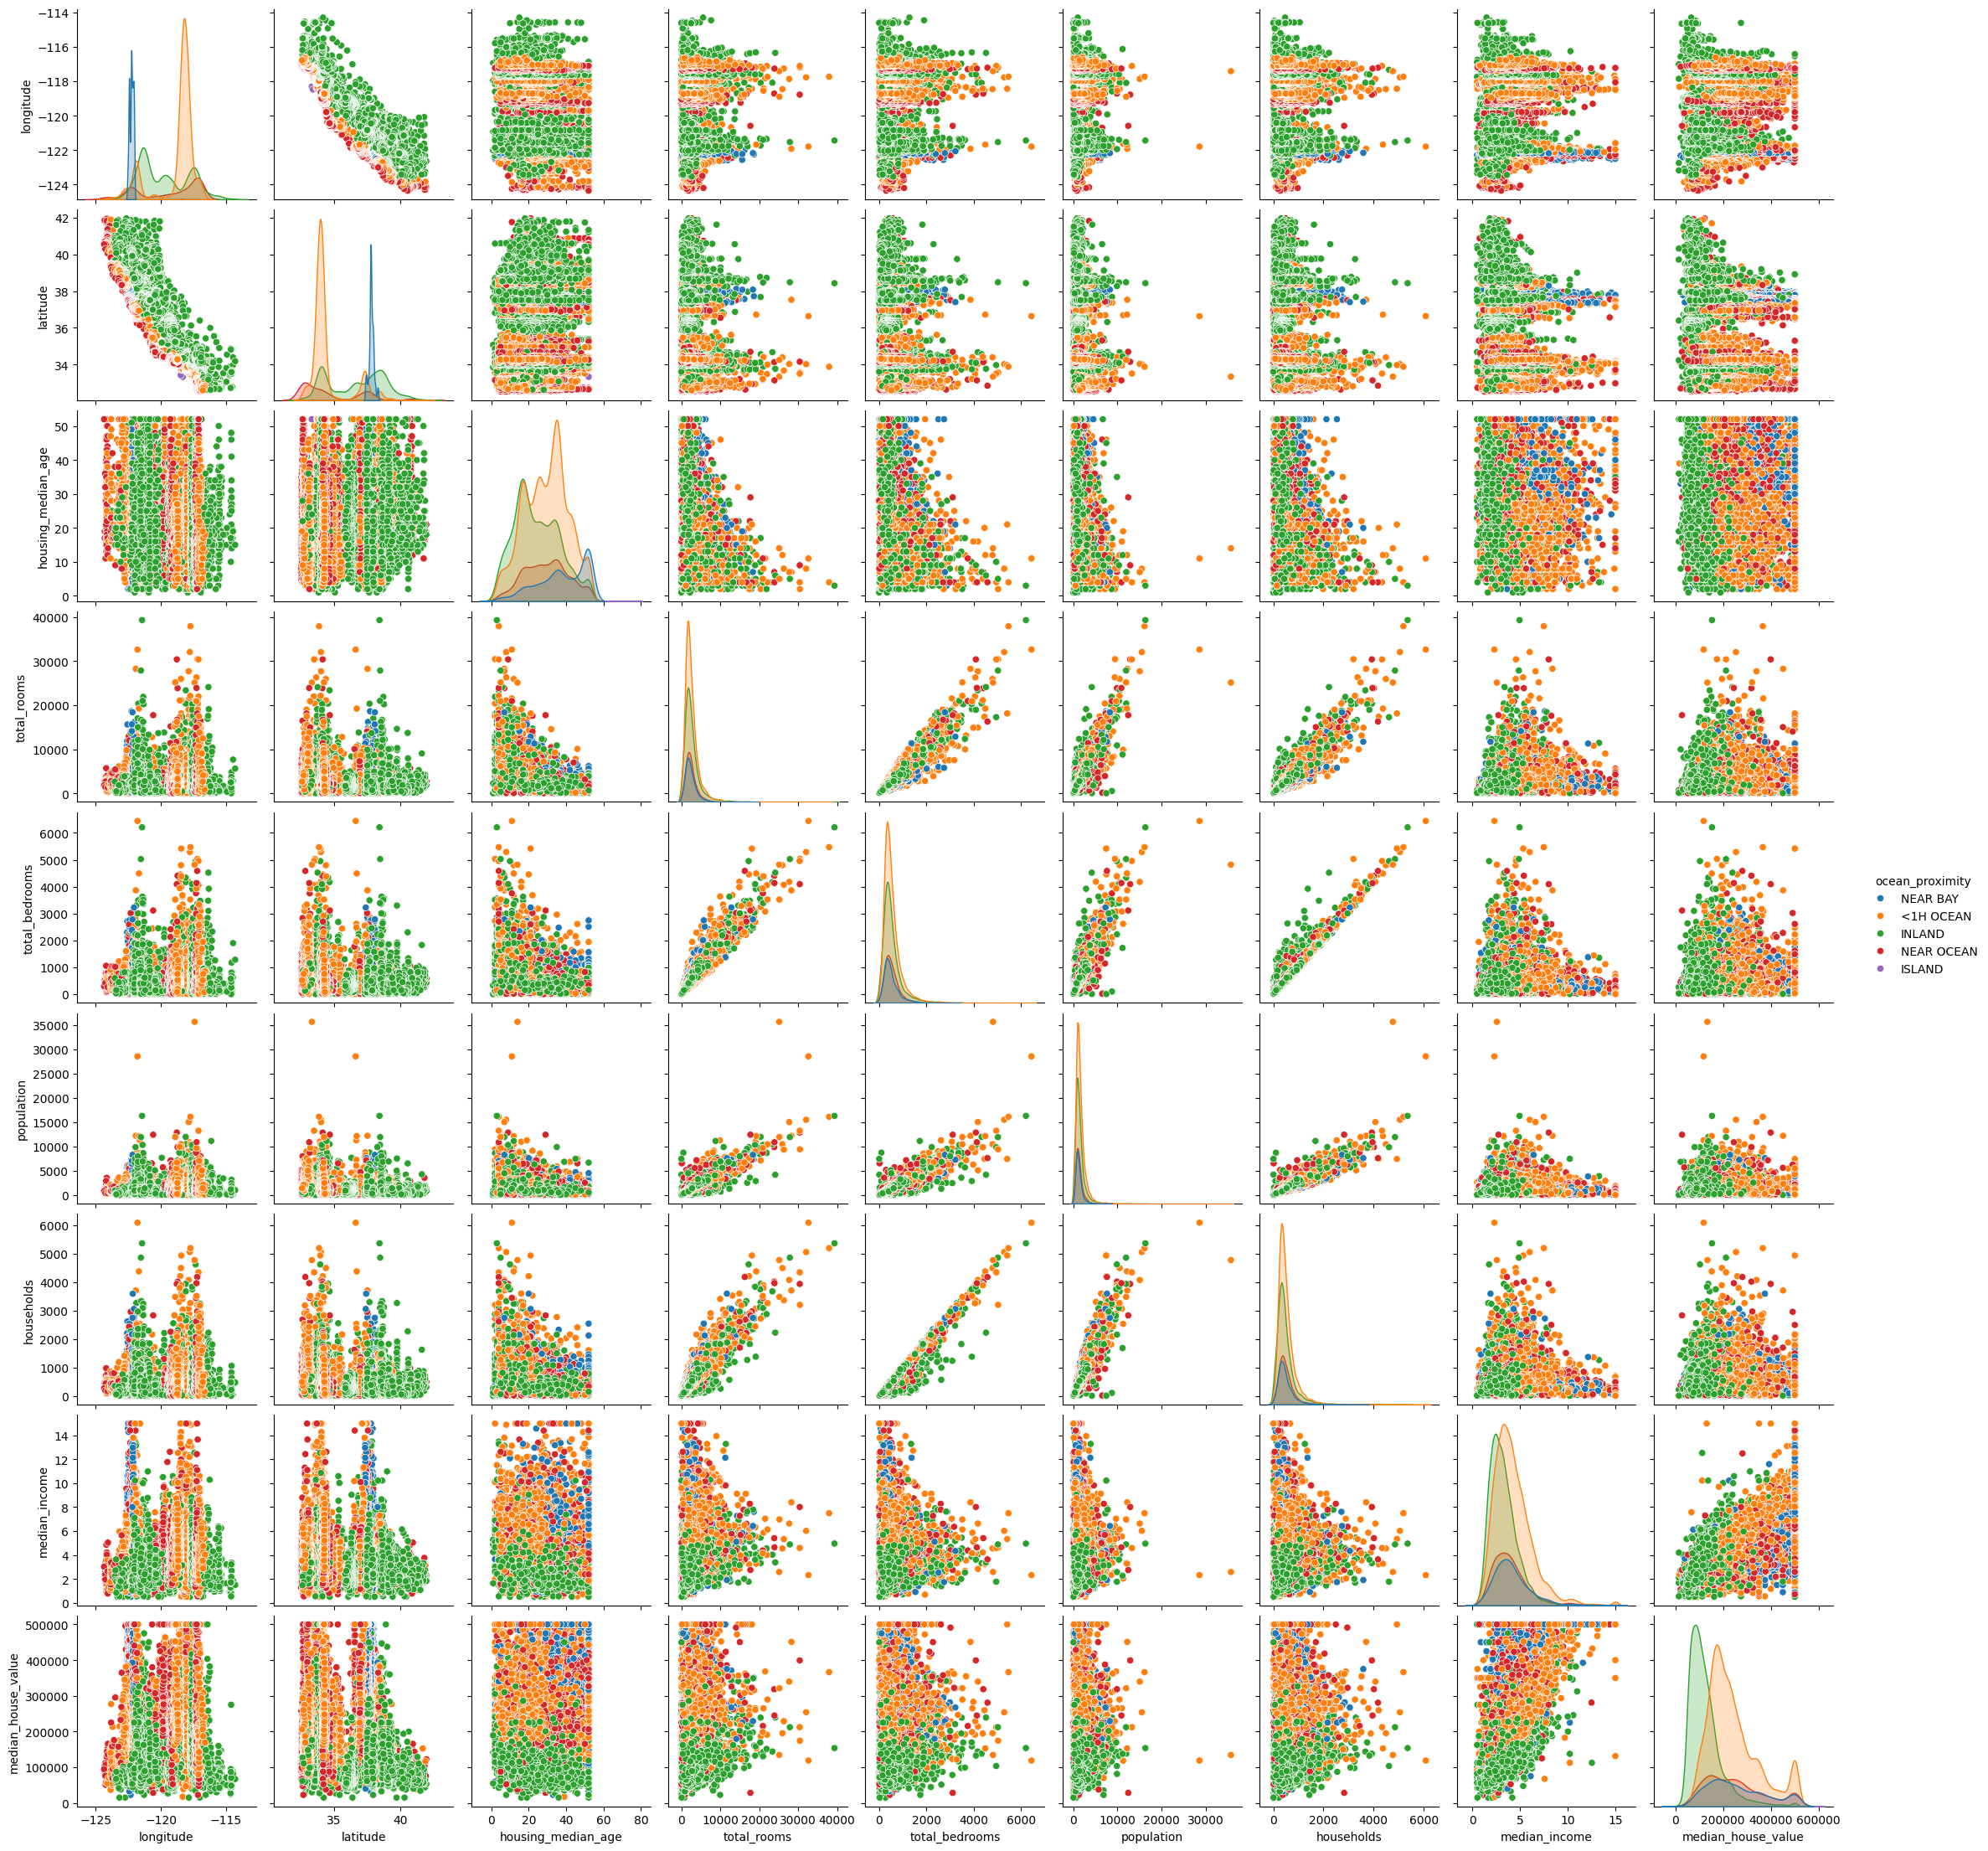

In [6]:
ax = sns.pairplot(df, hue='ocean_proximity')

### 3. Separe os dados em validação e teste

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

### 4. Treine duas árvores, uma com profundidade máxima = 8, outra com profundidade máxima = 2.

In [8]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=8)

regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


### 5. Calcule o MSE de cada uma das árvores do item anterior para a base de treinamento e para a base de testes.

In [158]:
r2_1 = regr_1.score(X_train, y_train)
r2_2 = regr_2.score(X_train, y_train)

template = "O R2 da árvore com profundidade={0} é: {1:.2f}"

print(template.format(regr_1.get_depth(),r2_1).replace(".",","))
print(template.format(regr_2.get_depth(),r2_2).replace(".",","))

O R2 da árvore com profundidade=2 é: 0,49
O R2 da árvore com profundidade=8 é: 0,76


In [156]:
y_pred_reg_2 = regr_1.predict(X_train)
y_pred_reg_8 = regr_2.predict(X_train)

In [157]:
mse1 = mean_squared_error(y_train, y_pred_reg_2)
mse2 = mean_squared_error(y_train, y_pred_reg_8)

print(f'O MSE para profundidade 2 foi: {mse1}.')
print(f'O MSE para profundidade 8 foi: {mse2}.')

O MSE para profundidade 2 foi: 6718783701.322572.
O MSE para profundidade 8 foi: 3159252381.708983.


Não confiando muito no resultados e acreditando ter algum erro no codigo acima, eu decidi fazer o calculo do erro quadratico médio usando o loop '*for*'
O resultado foi exatamento o mesmo do método do sklearn mostrando que o resultado está correto.

In [153]:
soma = 0
for i in range(len(y_train)):
    soma += (y_train.iloc[i] - y_pred_reg_2[i]) ** 2
print(soma/(len(y_train)))

soma = 0
for i in range(len(y_train)):
    soma += (y_train.iloc[i] - y_pred_reg_8[i]) ** 2
print(soma/(len(y_train)))


6718783701.322603
3159252381.7089996


### 6. Com base nos resultados do item anterior, qual árvore te parece mais adequada?

Segundo a analise feita no item N-5, o resultado do R2 (Quanto maior melhor) mostrou que a profundidade=8 obteve o melhor resultado,
Utilizando o metodo do MSE (Quanto menor melhor), ficou provado que a arvore com profundidade=8 realmente tem o melhor resultado.

### 7. Faça uma visualização gráfica dessa árvore. Vamos discutir importância de variável mais adiante, mas veja a sua árvore, e pense um pouco: qual variável te parece mais "importante" na árvore?

A variável de (median_income), apesar de nao ser facil de enchergar a arvore, mas acredito que essa seja a variavel mais importante.

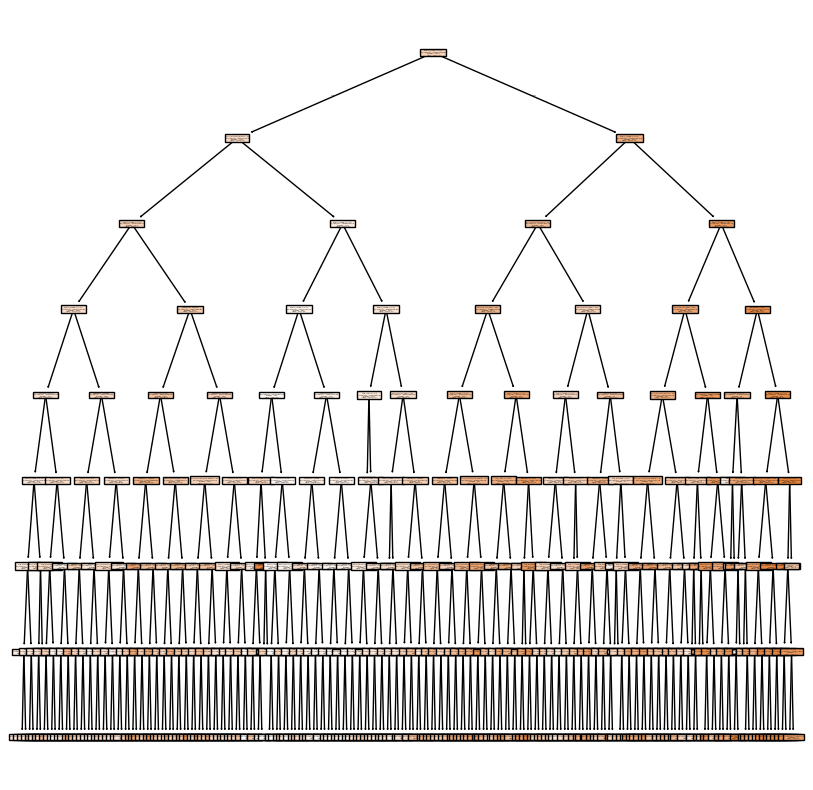

In [44]:
plt.rc('figure', figsize=(10, 10))
tp = tree.plot_tree(regr_2, 
                    feature_names=X.columns,  
                    filled=True) 